#  what we want to achive ?
#segment the cutomer based on RFM so that the company can target its customer eficiently
#  R (Recency): number of days since last purchase
#  F (Frequency): number of transaction
#  M (Monetary): Total amount of transaction (revenue contributeed)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [61]:
retail1 = pd.read_csv("C:/Users/Aman/Downloads/OnlineRetail.csv", encoding="ISO-8859-1")


In [63]:
retail1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [68]:
retail1['Country'].head()

0    United Kingdom
1    United Kingdom
2    United Kingdom
3    United Kingdom
4    United Kingdom
Name: Country, dtype: object

In [6]:
retail1.shape

(541909, 8)

In [13]:
retail1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [9]:
(100* retail1.isnull().sum()/len(retail1),2)

(InvoiceNo       0.000000
 StockCode       0.000000
 Description     0.268311
 Quantity        0.000000
 InvoiceDate     0.000000
 UnitPrice       0.000000
 CustomerID     24.926694
 Country         0.000000
 dtype: float64,
 2)

In [11]:
retail1 = retail1.dropna()
retail1.shape

(406829, 8)

In [26]:
retail1.loc[:, 'CustomerID'] = retail1['CustomerID'].astype(str)
retail['CustomerID'] = retail['CustomerID'].astype(str)

In [30]:
# new atribute : Monetary 

retail1.loc[:, "Amount"] = retail1['Quantity'] * retail1['UnitPrice']
rfm_m = retail1.groupby('CustomerID')['Amount'].sum()
rfm_m.head()


CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [15]:
# new atribute : frequency

rfm_f = retail1.groupby('CustomerID')['InvoiceNo'].count()
rfm_f =  rfm_f.reset_index()
rfm_f.columns = ['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [16]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID',  how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [32]:
 #new Atribute : recency

# convert to datetime to proper datatype
retail1.loc[:, 'InvoiceDate'] = pd.to_datetime(retail1['InvoiceDate'], format='%d-%m-%Y %H:%M')


In [20]:
retail1['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [21]:
# compute the max date to know the latest transaction date 

max_date = max(retail1['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [34]:
# compute the difrence between max date and transaction date
retail1.loc[:,'Diff_P'] = max_date - retail1['InvoiceDate']
retail1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff_P
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [36]:
# compute recency of customer

rfm_p = retail1.groupby('CustomerID')['Diff_P'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff_P
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [38]:
rfm_p['Diff_P'] = rfm_p['Diff_P'].dt.days  # Extract only days



In [40]:
rfm_p.head()

,CustomerID,Diff_P
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [41]:
#  merge the dataframe to gate the final rfm dataframe 

rfm = pd.merge(rfm,rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'recency']
rfm.head()

,CustomerID,Amount,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<Axes: >

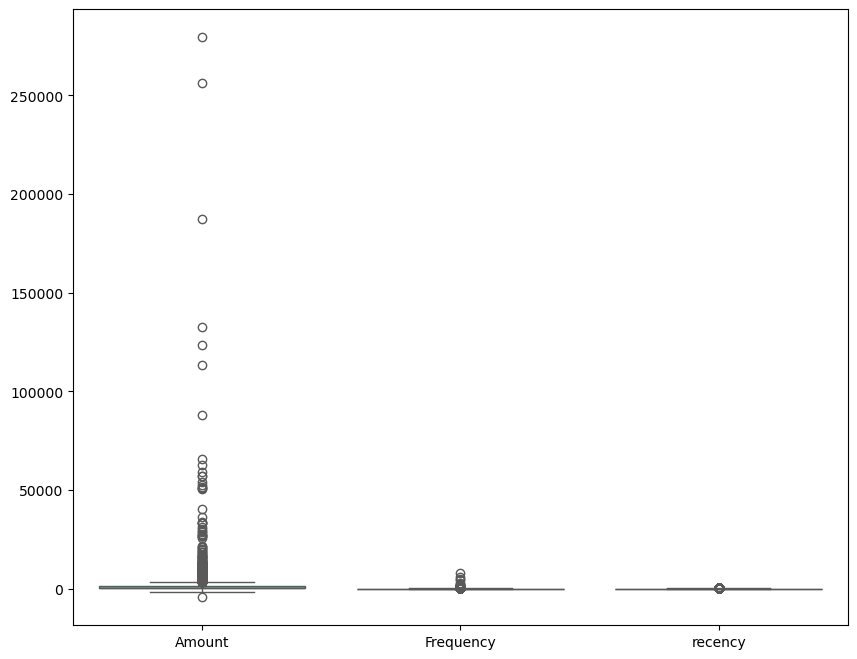

In [42]:
atributes = ['Amount', 'Frequency','recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[atributes], orient = 'v', palette='Set2')


In [43]:
# Removing statistical outlires for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

Q1 = rfm.recency.quantile(0.05)
Q3 = rfm.recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >Q1 - 1.5*IQR) & (rfm.recency <= Q3 + 1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [44]:
rfm_df = rfm[['Amount','Frequency','recency']]
 # instantiate
scaler = StandardScaler()

# fit transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [45]:
(rfm.dtypes)

CustomerID     object
Amount        float64
Frequency       int64
recency         int64
dtype: object

In [46]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount','Frequency','recency']


#  model building

In [47]:
# kmeans with some arbitrary

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [48]:
kmeans.labels_

array([1, 3, 0, ..., 1, 0, 0])

In [49]:
from sklearn.cluster import KMeans

In [50]:
print(dir(kmeans))  # This will list all attributes

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_algorithm', '_build_request_for_signature', '_check_feature_names', '_check_mkl_vcomp', '_check_n_features', '_check_params_vs_input', '_check_test_data', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_init_centroids', '_more_tags', '_n_features_out', '_n_init', '_n_threads', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_outp

In [51]:
set(kmeans.labels_)

{0, 1, 2, 3}

#  Elbow curve to get the right number of cluster

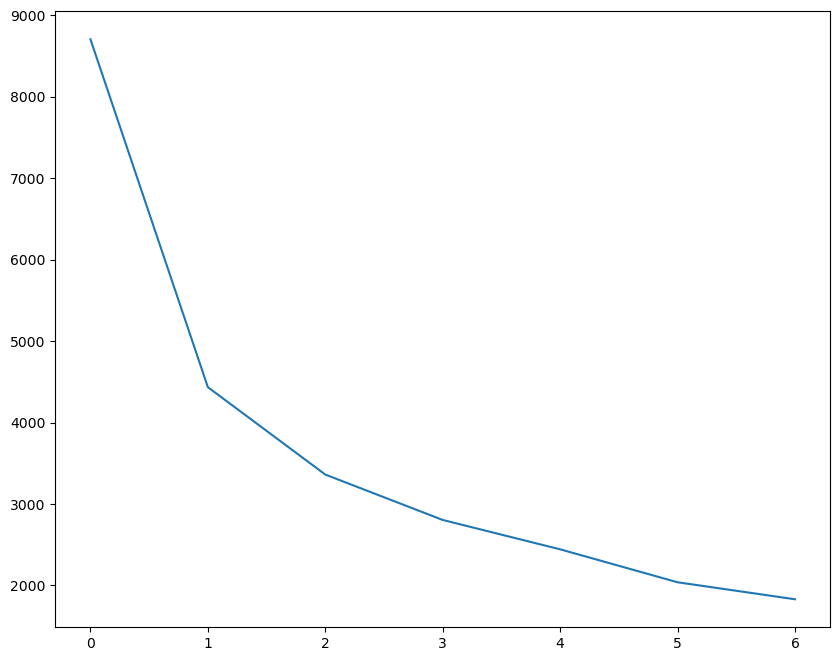

In [53]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)
    # plot the ssds for each n_clusters
plt.plot(ssd)

In [54]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [57]:
import pickle  # Import pickle module


In [59]:
# Define filename for pickle file
filename = 'kmeans_model.pkl'

# open file in write mode
with open('kmeans_saved_model', 'wb') as file:
    # save the kmeans model to the file
    pickle.dump(kmeans, file)

# colse the file
file.close()

pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))


In [62]:
rwtail1.head()

NameError: name 'rwtail1' is not defined